# Minimal example with TensorFlow 2.0

In this notebook we will recreate our machine learning algorithm using TF 2.0

## Import the relevant libraries

In [5]:
import numpy as np
#import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [6]:
observations=1000

xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))

generated_inputs=np.column_stack((xs,zs))

noise=np.random.uniform(-1,1,(observations,1))
generated_targets=2*xs-3*zs+5+noise

np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

## Solving with TensorFlow

In [7]:
training_data=np.load('TF_intro.npz')

input_size=2
output_size=1

In [25]:
# When we are employing TensorFlow we must actually BUILD the model
model=tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1), 
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1))])

custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer,loss='mean_squared_error')  #optimzer='sgd'=Stochastic Gradient Descent, mean_squared_error=L2-norm scaled by observations (least sum of squared error)

model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2) # epochs = number of iterations, verbose=0 'silence', 1='progress bar', 2='one line per epoch'.

Epoch 1/100
32/32 - 0s - loss: 21.1495 - 299ms/epoch - 9ms/step
Epoch 2/100
32/32 - 0s - loss: 1.2007 - 73ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4160 - 62ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.3810 - 39ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4252 - 59ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3761 - 57ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3967 - 55ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3669 - 55ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3576 - 42ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3859 - 55ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.5182 - 44ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3933 - 56ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3839 - 43ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3564 - 57ms/epoch - 2ms/step
Epoch 15/100
32/32 - 0s - loss: 0.4350 - 56ms/epoch - 2ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3905 - 43ms/epoch - 1ms/step

## Extract the weights and bias

In [26]:
model.layers[0].get_weights()

[array([[ 1.966052],
        [-3.102949]], dtype=float32),
 array([4.9995446], dtype=float32)]

In [27]:
weights=model.layers[0].get_weights()[0]
weights

array([[ 1.966052],
       [-3.102949]], dtype=float32)

In [28]:
bias=model.layers[0].get_weights()[1]
bias

array([4.9995446], dtype=float32)

## Extract the outputs (make predictions)

In [29]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 32.2],
       [-15.3],
       [ 35.1],
       [  2.1],
       [ 10.2],
       [-12.9],
       [-31.4],
       [ 14.6],
       [ 19. ],
       [-15.2],
       [-10.9],
       [ 46.1],
       [ -6. ],
       [ 43. ],
       [ 20. ],
       [  1.5],
       [  1. ],
       [ 32.3],
       [  4.2],
       [  2.9],
       [-16. ],
       [ 16.4],
       [  1.5],
       [-23.4],
       [  4.5],
       [  2. ],
       [ -4.8],
       [  9.4],
       [ -9.7],
       [ 16. ],
       [ -5.3],
       [  1. ],
       [ -8. ],
       [-16.2],
       [ -0.6],
       [ 22.4],
       [-13.5],
       [  0.7],
       [ 11.1],
       [ 21.8],
       [-17.3],
       [  5.9],
       [ 11.5],
       [ -3.6],
       [-15.6],
       [  2. ],
       [ 29.6],
       [ 47.2],
       [ 47.5],
       [-23.4],
       [ 23.9],
       [  3. ],
       [  7.4],
       [  6. ],
       [  9.4],
       [ 28.7],
       [ 21.7],
       [ 11.6],
       [  6.6],
       [ 11.5],
       [  5.5],
       [  8.2],
       [

In [30]:
training_data['targets'].round(1)

array([[ 32.2],
       [-14.4],
       [ 34.8],
       [  1.4],
       [  9.7],
       [-12.6],
       [-30.6],
       [ 14.3],
       [ 19.4],
       [-15.4],
       [-11.2],
       [ 45.5],
       [ -5.7],
       [ 41.6],
       [ 19.5],
       [  1.1],
       [  1.4],
       [ 31.7],
       [  4.6],
       [  2.3],
       [-15.2],
       [ 17.3],
       [  2.7],
       [-22.2],
       [  6. ],
       [  1.7],
       [ -4.5],
       [  9.5],
       [ -8.5],
       [ 16.2],
       [ -5.9],
       [  0.5],
       [ -8.9],
       [-15.8],
       [  0.2],
       [ 21.5],
       [-11.9],
       [  1.2],
       [  9.9],
       [ 21.5],
       [-17.3],
       [  5.3],
       [ 11.7],
       [ -2.9],
       [-15.8],
       [  2.6],
       [ 29. ],
       [ 47.4],
       [ 46.8],
       [-23.1],
       [ 23.1],
       [  3.1],
       [  6.8],
       [  7.2],
       [  9. ],
       [ 28.1],
       [ 22.4],
       [ 11.4],
       [  7.7],
       [ 12.9],
       [  5.6],
       [  6.9],
       [

## Plotting the data

In [31]:
import matplotlib.pyplot as plt

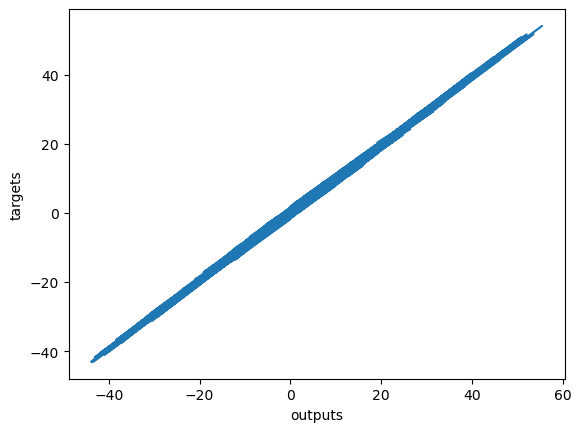

In [32]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()